In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [7]:
df=pd.read_csv('Titanic-Dataset.csv')

In [8]:
df.sample(5)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
#df['family']=df['Parch'] + df['SibSp']

In [ ]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [ ]:
df

<h1 style='color:#DE006F'>Splitting Data and Analyzing Missing Values in Training Features</h1>

In [23]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
family         0.000000
dtype: float64

In [24]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
X_train.shape,X_test.shape

((712, 10), (179, 10))

In [27]:
X_train.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.207865
Ticket         0.000000
Fare           0.000000
Cabin          0.775281
Embarked       0.002809
family         0.000000
dtype: float64

<h1 style='color:#DE006F'>Handling Missing Values Using Mean and Median Imputation</h1>

In [28]:
median_age=X_train['Age'].median()
mean_age=X_train['Age'].mean()

In [29]:
X_train['Age_median']=X_train['Age'].fillna(median_age)
X_train['Age_mean']=X_train['Age'].fillna(mean_age)

In [30]:
X_train.sample(5)

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family,Age_median,Age_mean
104,105,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,3101276,7.925,NaN,S,2,37.00,37.000000
542,543,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,347082,31.275,NaN,S,6,11.00,11.000000
47,48,3,"O'Driscoll, Miss. Bridget",female,NaN,14311,7.750,NaN,Q,0,28.75,29.785904
256,257,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,PC 17585,79.200,NaN,C,0,28.75,29.785904
714,715,2,"Greenberg, Mr. Samuel",male,52.0,250647,13.000,NaN,S,0,52.00,52.000000


<h1  style='color:#DE006F'>Analyzing the Impact of Mean and Median Imputation on Variance and Distribution</h1>

In [31]:
print('Original Age variance:',X_train['Age'].var())
print('Age variance after median imputation:',X_train['Age_median'].var())
print('Age variance after mean imputation:',X_train['Age_mean'].var())

Original Age variance: 204.34951339046142
Age variance after median imputation: 161.98956633460548
Age variance after mean imputation: 161.81262452718676


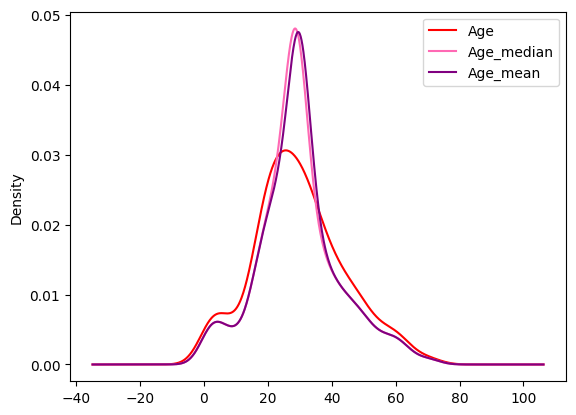

In [32]:
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111)

#Plot for Original 'Age' Data:
X_train['Age'].plot(kind='kde',ax=ax,color='red')

#Plot for Median-Imputed Data:
X_train['Age_median'].plot(kind='kde',ax=ax,color='#FF69B4')

#Plot for Mean-Imputed Data:
X_train['Age_mean'].plot(kind='kde',ax=ax,color='purple')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [35]:
#X_train.cov()

In [36]:
#X_train.corr()

<Axes: >

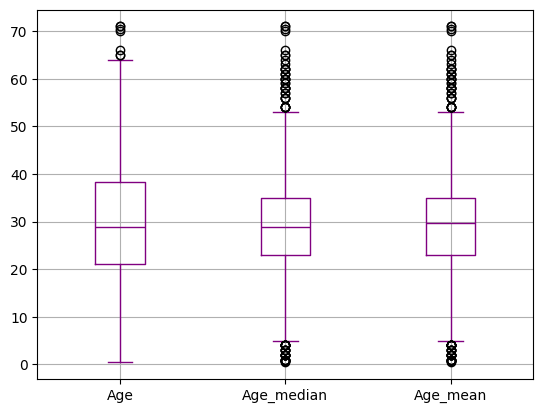

In [38]:
X_train[['Age','Age_median','Age_mean']].boxplot(color='purple')

<h1  style='color:purple'>MEAN/MEDIAN IMPUTATION USING SCIKIT LEARN</h1>


In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
imputer1=SimpleImputer(strategy='median')
# imputer2=SimpleImputer(strategy='mean')



In [65]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
  # ('imputer2',imputer2,['Fare'])
    
],remainder='passthrough')

In [66]:
trf.fit(X_train)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age'])])

In [46]:
trf.named_transformers_['imputer1'].statistics_
#median of the column

array([28.75])

In [67]:
#trf.named_transformers_['imputer2'].statistics_
#mean of the column

In [68]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)

In [69]:
X_train

array([[40.0, 31, 1, ..., nan, 'C', 0],
       [4.0, 11, 3, ..., 'G6', 'S', 2],
       [47.0, 874, 3, ..., nan, 'S', 0],
       ...,
       [71.0, 494, 1, ..., nan, 'C', 0],
       [28.75, 528, 1, ..., 'C95', 'S', 0],
       [28.75, 169, 1, ..., nan, 'S', 0]], dtype=object)